## Imports 

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
from binary_layers import BinaryConv2D, BinaryDense

## Load dataset Directory

In [2]:
# !unzip archive.zip -d /content/dataset

## Load Dataset

In [3]:
train_df=pd.read_csv(os.getcwd( )+'/sign_mnist_train.csv')
test_df=pd.read_csv(os.getcwd( )+'/sign_mnist_test.csv')

In [4]:
 test_df.loc[:8, "label"]

0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
Name: label, dtype: int64

In [5]:
train_df_images = train_df.loc[:, "pixel1":]
train_df_label = train_df.loc[:, "label"]

test_df_images = test_df.loc[:, "pixel1":]
test_df_label  = test_df.loc[:, "label"]

In [6]:
test_df_images=test_df_images/255.0
train_df_images=train_df_images/255.0

In [7]:
class_names = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','V','W','X','Y','Z']

class_names[0]

'A'

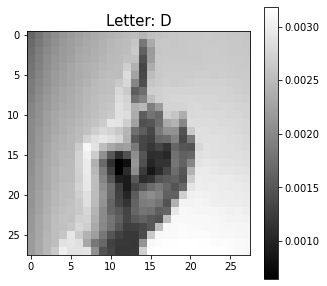

In [8]:
data_array = np.array(train_df_images.loc[0, :])
shaped_data = np.reshape(data_array, (28, 28))

plt.figure(figsize = (5,5))
sign_img = plt.imshow(shaped_data/255.0, cmap=plt.cm.gray)
plt.colorbar(sign_img)
plt.title("Letter: "+class_names[train_df_label[0]], fontsize=15)
plt.show()

In [9]:
train_df_images = np.array(train_df_images)
test_df_images = np.array(test_df_images)

train_df_images = train_df_images.reshape(train_df_images.shape[0], 28, 28, 1)
test_df_images = test_df_images.reshape(test_df_images.shape[0], 28, 28, 1)

print(train_df_images.shape, test_df_images.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [10]:
nclasses = train_df_label.min()
nclasses

0

In [11]:
nclasses = train_df_label.max() - train_df_label.min() + 1
train_df_label = tf.keras.utils.to_categorical(train_df_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", train_df_label.shape)

Shape of ytrain after encoding:  (27455, 25)


In [12]:

test_df_label = tf.keras.utils.to_categorical(test_df_label, num_classes = None)
print("Shape of ytest after encoding: ", test_df_label.shape)

Shape of ytest after encoding:  (7172, 25)


## Visualize data

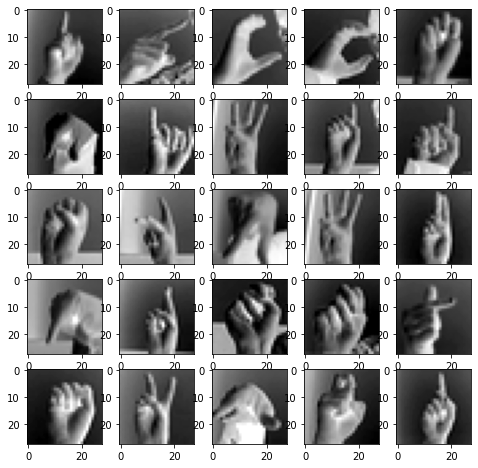

In [13]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = train_df_images[i]
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
plt.show()



## Create Model

In [14]:



model = keras.Sequential([
    keras.layers.Conv2D(24, (5, 5), padding = "same", input_shape=(28,28,1)),
    keras.layers.Activation('relu'),

    BinaryConv2D(32,kernel_size=[5, 5],use_bias=False, padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    BinaryConv2D(64, kernel_size=[5, 5],use_bias=False, padding = "same"),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(128, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),


    BinaryConv2D(128, kernel_size=[5, 5],use_bias=False, padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(256, (5, 5), padding = "same"), 
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    BinaryDense(1024,use_bias=False,kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),

    keras.layers.Dense(25, activation='softmax'),
    ])


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        624       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 24)        0         
_________________________________________________________________
binary_conv2d (BinaryConv2D) (None, 28, 28, 32)        19200     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

## Compile and Train

In [15]:

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
history = model.fit(train_df_images, train_df_label, epochs=10, validation_split=0.2)

Epoch 1/10
687/687 [==============================] - 5s 7ms/step - loss: 3457.9673 - accuracy: 0.7362 - val_loss: 922.0295 - val_accuracy: 0.9674
Epoch 2/10
687/687 [==============================] - 5s 7ms/step - loss: 317.4303 - accuracy: 0.9395 - val_loss: 47.6099 - val_accuracy: 0.9519
Epoch 3/10
687/687 [==============================] - 5s 7ms/step - loss: 12.5567 - accuracy: 0.9665 - val_loss: 0.7993 - val_accuracy: 0.9933
Epoch 4/10
687/687 [==============================] - 5s 7ms/step - loss: 0.2434 - accuracy: 0.9750 - val_loss: 0.0281 - val_accuracy: 0.9924
Epoch 5/10
687/687 [==============================] - 5s 7ms/step - loss: 0.0850 - accuracy: 0.9768 - val_loss: 0.0098 - val_accuracy: 0.9978
Epoch 6/10
687/687 [==============================] - 5s 7ms/step - loss: 0.0721 - accuracy: 0.9805 - val_loss: 0.0729 - val_accuracy: 0.9787
Epoch 7/10
687/687 [==============================] - 5s 8ms/step - loss: 0.0705 - accuracy: 0.9823 - val_loss: 0.0542 - val_accuracy: 0.98

Text(0.5, 1.0, 'Loss')

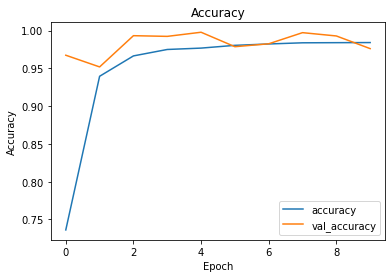

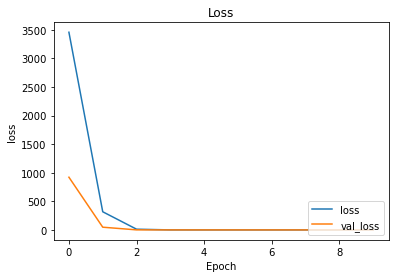

In [17]:
plt.figure(1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Loss")


## Evaluate and predict using the model


In [18]:

vc_loss, vc_accuracy = model.evaluate(test_df_images, test_df_label)
print("\nLOSS: {}\nACCURACY: {}".format(vc_loss, vc_accuracy))

225/225 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.9115

LOSS: 0.3459484279155731
ACCURACY: 0.9114612340927124


In [19]:
predictions = model.predict(test_df_images)

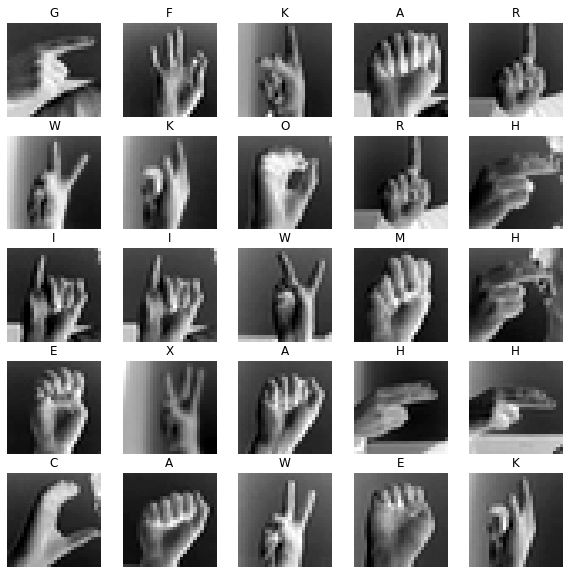

In [20]:
plt.figure(figsize=(10,10))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = test_df_images[i]    
    plt.subplot(rows, columns,i+1)
    plt.grid(False)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()


In [21]:
model.save('sign_mnist_binary.h5')

In [22]:
open('sign_mnist_model_binary.yaml', 'w').write(model.to_yaml())

11865